# Evaluating Random Forest Performance


## Introduction
In this lab, I will:
- Use the California Housing data set included in scikit-learn to predict the median house price based on various attributes.
- Create a random forest regression model and evaluate its performance.
- Investigate the feature importances for the model.


In [3]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install scipy==1.14.1

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Using cached numpy-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.2.0 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.0 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.2.0 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 

## Importing the required libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

### Load the California Housing data set


 Get the dataset below. Then, right click anywhere on the page, and save as. Then, upload the file to the working directory.

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv

In [9]:
import os
# Print current working directory to load the csv file
print(os.getcwd())

/home/af2ea8f5-1f9a-4091-9c13-db2b59ea1801/Skill Network/Machine Learning


In [10]:
# Print data
data = pd.read_csv("/home/af2ea8f5-1f9a-4091-9c13-db2b59ea1801/Skill Network/Machine Learning/housing.csv")
data.head()                   
                

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
# Dropping ocean_proximity for numerical analysis
X = data.drop(columns=['median_house_value', 'ocean_proximity'])
y = data['median_house_value']

### Print the description of the California Housing data set


In [12]:
print(data.info)

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

### Split the data into training and testing sets


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Explore the training data


In [15]:
# Create a copy of X_train as a DataFrame
eda = pd.DataFrame(data=X_train, columns=X.columns)

# Add the target variable
eda['median_house_value'] = y_train

# Summary statistics
eda.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Considering the 25th to the 75th percentile range, most of the median house prices fall within 119,800 and 265,000 dollars.

Text(0, 0.5, 'Frequency')

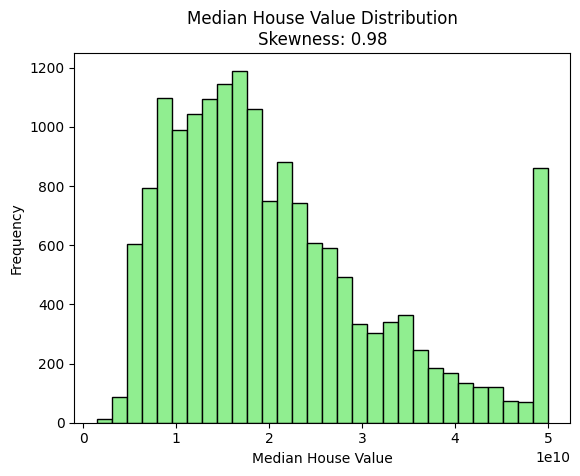

In [16]:
# Plot the distribution
plt.hist(1e5*y_train, bins=30, color='lightgreen', edgecolor='black')
plt.title(f'Median House Value Distribution\nSkewness: {skew(y_train):.2f}')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

Evidently, the distribution is skewed and there are quite a few clipped values at around $500,000.

### Model fitting and prediction
Let's fit a random forest regression model to the data and use it to make median house price predicions.

In [17]:
# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on test set
y_pred_test = rf_regressor.predict(X_test)

### Estimate out-of-sample MAE, MSE, RMSE, and R²


In [18]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 32044.3987
Mean Squared Error (MSE): 2484035195.2573
Root Mean Squared Error (RMSE): 49840.0963
R² Score: 0.8104


The mean absolute error is $32,044.4 

On average, predicted median house prices are off by $32k.

Mean squared error is less intuitive to interpret, but is usually what is being minimized by the model fit.
On the other hand, taking the square root of MSE yields a dollar value, here RMSE = $49,840.0963

An R-squared score of 0.81 is not considered very high. It means the model explains about %81 of the variance in median house prices, although this interpretation can be misleading for complex data with nonlinear relationships, skewed values, and outliers. R-squared can still be useful for comparing models though.

### Plot Actual vs Predicted values

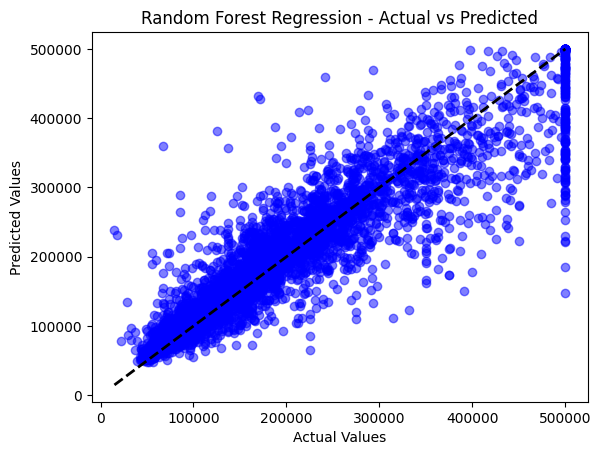

In [22]:
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression - Actual vs Predicted')
plt.show()

### Plot the histogram of the residual errors (dollars)

Average Error = -41467940
Standard deviation of error = 4983837112


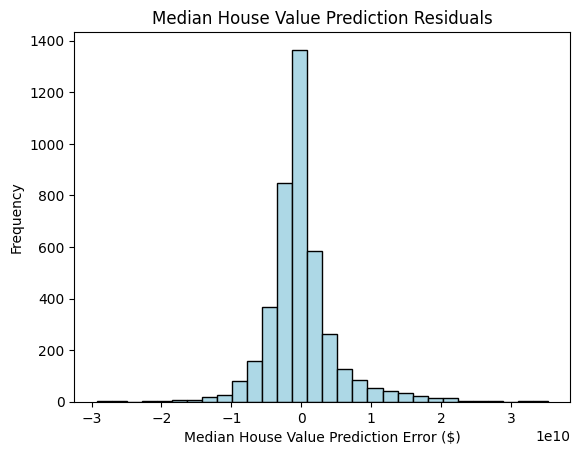

In [24]:
# Calculate the residual errors
residuals = 1e5*(y_test - y_pred_test)

# Plot the histogram of the residuals
plt.hist(residuals, bins =30, color='lightblue', edgecolor='black')
plt.title(f'Median House Value Prediction Residuals')
plt.xlabel('Median House Value Prediction Error ($)')
plt.ylabel('Frequency')
print('Average Error = ' + str(int(np.mean(residuals))))
print('Standard deviation of error = ' + str(int(np.std(residuals))))

The residuals are normally distributed.

### Plot the model residual errors by median house value.

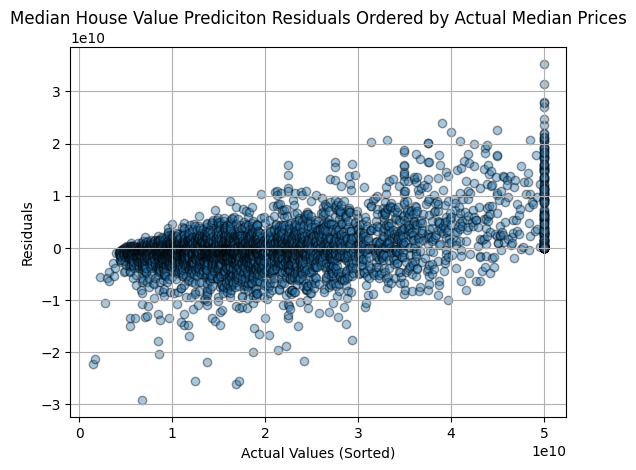

In [26]:
# Create a DataFrame to make sorting easy
residuals_df = pd.DataFrame({
    'Actual': 1e5*y_test,
    'Residuals': residuals
})

# Sort the DataFrame by the actual target values
residuals_df = residuals_df.sort_values(by='Actual')

# Plot the residuals
plt.scatter(residuals_df['Actual'], residuals_df['Residuals'], marker='o', alpha=0.4,ec='k')
plt.title('Median House Value Prediciton Residuals Ordered by Actual Median Prices')
plt.xlabel('Actual Values (Sorted)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

The average error as a function of median house price is actually increasing from negative to positive values. In other words, lower median prices tend to be overpredicted while higher median prices tend to be underpredicted.

 ### Display the feature importances as a bar chart.

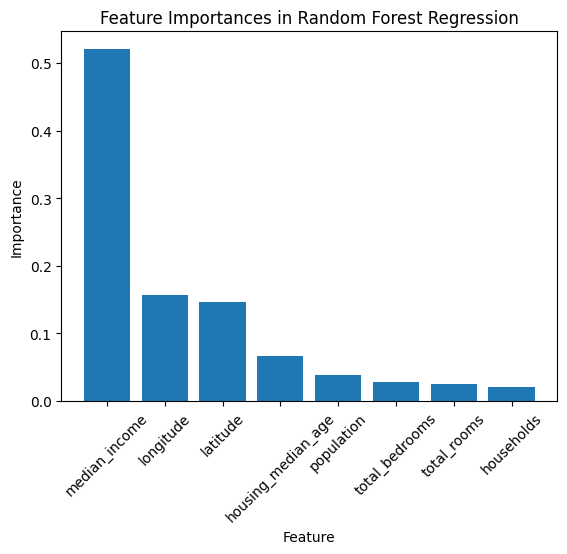

In [28]:
# Feature importances
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importances
plt.bar(range(X.shape[1]), importances[indices],  align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Regression")
plt.show()

It makes sense that median incomes and house prices would be correlated, so it's not surprising that median income is the most important feature. Since location is implied by two separate variables, latitude and longitude that share equal importances, we might speculate that location is really the second most important feature. This is because replacing latitude and longitude with a categorical location at an appropriate level of granularity (suburb, city, etc.) would likely have a combined lat/lng importance, which might outweigh average occupancy.

### Final thoughts:

Compared to linear regression, random forest regression is quite robust against outliers and skewed distributions. This is because random forest regression doesn't make any assumptions about the data distribution, where linear regression performs best with normally distributed data.
Standardizing the data isn't necessary like it is for distance-based algortihms like KNN or SVMs.